In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('./kddcup99.csv')

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.xwydx2ikjw2nmtwsfyngfuwkqu3lytcz.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df.loc[(df.label !="normal"),"target"] = 1
df.loc[(df.label =="normal"),"target"] = 0

In [3]:
df = df._get_numeric_data()
y = df['target']
df = df.drop(['target'], axis=1)
X = df['src_bytes']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [5]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:               345814
Model:                            GLM   Df Residuals:                   345812
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.7142e+05
Date:                Wed, 22 Jun 2022   Deviance:                   3.4285e+05
Time:                        19:12:02   Pearson chi2:                 3.46e+05
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4070      0.004    328.654      0.000       1.399       1.415
src_bytes   2.878e-07   1.35e-07      2.137      0.033    2.38e-08    5.52e-07
==============================================================================
"""

In [6]:
y_train_pred = res.predict(X_train_sm)  

In [7]:
data = {'src_bytes':X_train, 'target':y_train, 'y_train_pred':y_train_pred}
data_train = pd.DataFrame(data)

In [8]:
data_train['predict'] = data_train.y_train_pred.map(lambda x: 1 if x > 0.5 else 0)
data_train.head()

,src_bytes,target,y_train_pred,predict
396900,236,0.0,0.803302,1
314273,1032,1.0,0.803338,1
103308,1032,1.0,0.803338,1
24753,292,0.0,0.803305,1
341552,1032,1.0,0.803338,1


In [9]:
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    data_train[i]= data_train.y_train_pred.map(lambda x: 1 if x > i else 0)
data_train.head()

,src_bytes,target,y_train_pred,predict,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
396900,236,0.0,0.803302,1,1,1,1,1,1,1,1,1,1,0
314273,1032,1.0,0.803338,1,1,1,1,1,1,1,1,1,1,0
103308,1032,1.0,0.803338,1,1,1,1,1,1,1,1,1,1,0
24753,292,0.0,0.803305,1,1,1,1,1,1,1,1,1,1,0
341552,1032,1.0,0.803338,1,1,1,1,1,1,1,1,1,1,0


In [10]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
sensitivity_prob = []
for i in numbers:
    cm1 = metrics.confusion_matrix(data_train.target, data_train[i])
    total1=sum(sum(cm1))
    Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    sensitivity_prob.append(Sensitivity)

data = {'prob': sensitivity_prob, 'number':numbers}
sensitivity_df = pd.DataFrame(data)
sensitivity_prob

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.00012958496814369534]

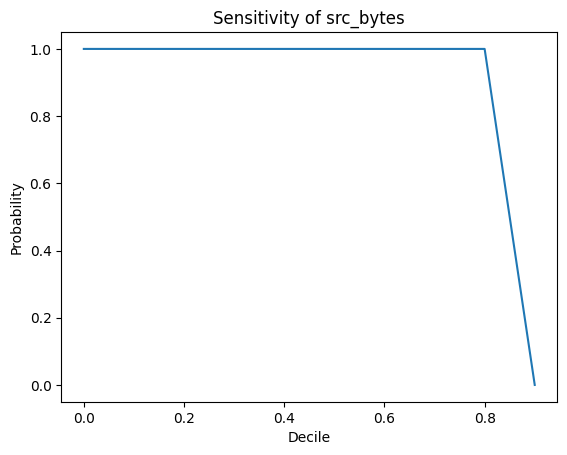

In [11]:
import matplotlib.pyplot as plt
plt.plot(sensitivity_df["number"], sensitivity_df["prob"])
plt.xlabel('Decile')
plt.ylabel('Probability')
plt.title('Sensitivity of src_bytes')
plt.show()

__________________________________________________________________
__________________________________________________________________

In [12]:
df = pd.read_csv('./kddcup99.csv') 
df.loc[(df.label !="normal"),"target"] = 1
df.loc[(df.label =="normal"),"target"] = 0
df = df._get_numeric_data()
y = df['target']
df = df.drop(['target'], axis=1)
X = df[['src_bytes','dst_bytes','dst_host_srv_count','dst_host_count']]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:               345814
Model:                            GLM   Df Residuals:                   345809
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.1112e+05
Date:                Wed, 22 Jun 2022   Deviance:                   2.1954e+05
Time:                        19:14:08   Pearson chi2:                 4.95e+16
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.3451      0.037   -116.378      0.000      -4.418      -4.272
src_bytes           4.247e-06   1.09e-06      3.898      0.000    2.11e-06    6.38e-06
dst_bytes          -3.736e-05   2.13e-06    -17.523      0.000   -4.15e-05   -3.32e-05
dst_host_srv_count    -0.0020   5.89e-05    -34.704      0.000      -0.002      -0.002
dst_host_count         0.0271      0.000    183.588      0.000       0.027       0.027
======================================================================================
"""

In [14]:
y_train_pred = res.predict(X_train_sm)  

In [15]:
data_train = X_train
data_train['target'] = y_train
data_train['y_train_pred'] = y_train_pred
data_train['predict'] = data_train.y_train_pred.map(lambda x: 1 if x > 0.5 else 0)
data_train.head()

,src_bytes,dst_bytes,dst_host_srv_count,dst_host_count,target,y_train_pred,predict
396900,236,2698,247,255,0.0,0.875736,1
314273,1032,0,255,255,1.0,0.884982,1
103308,1032,0,255,255,1.0,0.884982,1
24753,292,276,255,68,0.0,0.045871,0
341552,1032,0,255,255,1.0,0.884982,1


In [16]:
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    data_train[i]= data_train.y_train_pred.map(lambda x: 1 if x > i else 0)
data_train.head()

,src_bytes,dst_bytes,dst_host_srv_count,dst_host_count,target,y_train_pred,predict,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
396900,236,2698,247,255,0.0,0.875736,1,1,1,1,1,1,1,1,1,1,0
314273,1032,0,255,255,1.0,0.884982,1,1,1,1,1,1,1,1,1,1,0
103308,1032,0,255,255,1.0,0.884982,1,1,1,1,1,1,1,1,1,1,0
24753,292,276,255,68,0.0,0.045871,0,1,0,0,0,0,0,0,0,0,0
341552,1032,0,255,255,1.0,0.884982,1,1,1,1,1,1,1,1,1,1,0


In [17]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
sensitivity_prob = []
for i in numbers:
    cm1 = metrics.confusion_matrix(data_train.target, data_train[i])
    total1=sum(sum(cm1))
    #Accuracy = (cm1[0,0]+cm1[1,1])/total1
    #Specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    sensitivity_prob.append(Sensitivity)

data = {'prob': sensitivity_prob, 'number':numbers}
sensitivity_df = pd.DataFrame(data)
sensitivity_prob

[1.0,
 0.9930744033692092,
 0.9925848601562218,
 0.9923292898023829,
 0.9921277131852705,
 0.9919657319750909,
 0.9917965516000145,
 0.9915805766531083,
 0.9913214067168209,
 0.2798747345307944]

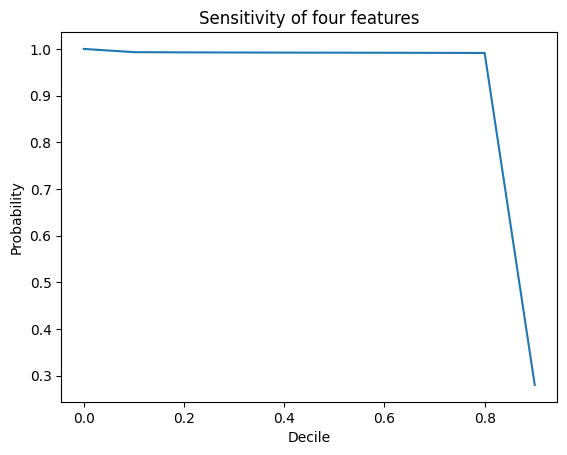

In [18]:
import matplotlib.pyplot as plt
plt.plot(sensitivity_df["number"], sensitivity_df["prob"])
plt.xlabel('Decile')
plt.ylabel('Probability')
plt.title('Sensitivity of four features')
plt.show()